<b><h1>Project Overview</h1>
<h3>Description</h3></b>
Choose a topic that interests you and find some data.  Using your knowledge of pandas, matplotlib and scikit-learn, create a machine learning application on a dataset that interests you. Taking advantage of Colab, you will embed narratives intermixed with code.  Each requirement below is its own text and code block in Colab.  It is probably best to use multiple text and code blocks for each requirement.
<br>
<b><h3>Requirements</h3></b>
<ol>
  <li><i>Background information and data retrieval</i><br>
    <u>Text Block</u> Provide a brief description of the dataset.  
    <ul>
      <li>General information about the dataset</li>
      <li>What is your machine learning application predicting?</li>
      <li>How is this prediction useful to someone?</li>
    </ul>
    <u>Code Block</u>   
    <ul>
      <li>Load the libraries</li>
      <li>Load the dataset</li>
      <li>Provide a preview of the data</li>
    </ul>
  </li>
  <li><i>Data Preparation</i><br>
    <u>Text Block</u> Provide a brief description of the preparation that needed to be made to the data prior to creating the machine learning model.  
    <ul>
      <li>What cleaning did you have to perform?</li>
      <li>Do you have to filter the data to exclude outliers for instance?</li>
      <li>What analysis did you perform to determine the right features to use?</li>
    </ul>
    <u>Code Block</u> Following are possbile options 
    <ul>
      <li>Drop NaN. Transform and handle "dirty" data.</li>
      <li>View histograms, scatter plots, correlation matrices and heatmaps to analyze the data</li>
      <li>Filter the data</li>
      <li>Select the target and features. Split the data into a training and testing sets.</li>
    </ul>
  </li>
  <li><i>Model Building</i><br>
  <u>Text Block</u> Discuss the outcome of building the model.    
    <ul>
      <li>What is your machine learning application predicting?</li>
      <li>How well did does your model predict?</li>
      <li>Were there any modifications you made after creating the model?</li>
    </ul>
    <u>Code Block</u> 
    <ul>
      <li>Create and train the model.</li>
      <li>Evaluate the model.</li>
    </ul>
  </li>
  <li><i>Machine Learning Application</i><br>
    <u>Text Block</u> Discuss the outcome of machine learning application.    
    <ul>
      <li>What is your machine learning application predicting?</li>
      <li>How is this prediction useful to someone?</li>
      <li>Conclusion</li>
    </ul>
    <u>Code Block</u> Provide a couple of predictions to demonstrate that your machine learning application
  </li>


# **Background information and data retrieval**







The World Happiness Report is a landmark survey of the state of global happiness. This dataset contains information about a country's happiness status. This machine learning application is going to predict if the GDP per capita and social support of a country can affect a country Score. The government, organizations and civil society could use this to inform their policy-making decisions. This prediction of well-being can be used to assess the progress of nations. People can use this prediction to determine whether they should move there.

In [ ]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("https://MLResources.rennecastro.repl.co/2019_2015HappinessReport.csv")
df.head()



,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# **Data Preparation**

Before creating the machine learning model we need to prepare the data first. I calculated for any potential outliers and filter them.

In [ ]:
df.describe()
#LOOKING FOR OUTLIERS 
#FOR Score: IQR = Q3 - Q1 = 1.67975
#lower inner fence: Q1 - 1.5*IQR = 1.990125
#lower outer fence: Q1 - 3*IQR = -0.5295
#upper inner fence: Q3 + 1.5*IQR =  8.709125
#upper outer fence: Q3 + 3*IQR = 11.22875

#LOOKING FOR OUTLIERS 
#FOR GDP: IQR = Q3 - Q1 = 0.629687
#lower inner fence: Q1 - 1.5*IQR = -0.3380305
#lower outer fence: Q1 - 3*IQR = -1.282561
#upper inner fence: Q3 + 1.5*IQR =  2.1807175
#upper outer fence: Q3 + 3*IQR = 3.125248

#LOOKING FOR OUTLIERS 
#FOR Generosity: IQR = Q3 - Q1 = 0.148832
#lower inner fence: Q1 - 1.5*IQR = -0.093248
#lower outer fence: Q1 - 3*IQR = -0.316496
#upper inner fence: Q3 + 1.5*IQR =  0.50208
#upper outer fence: Q3 + 3*IQR = 0.725328


,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000
mean,2016.993606,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125436
std,1.417364,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105816
min,2015.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000
50%,2017.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.091000
75%,2018.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.156030
max,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910


In [ ]:
data = df[(df["GDP per capita"] > 0.25) & (df["GDP per capita"] < 1.70) & (df["Social support"] > 0.50)]
#data = df.drop(labels=["Country or region", "Year"],axis = 1)
data.head()


,Year,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,2019,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2019,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2019,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,2019,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,2019,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


After using data.dropna(), data.isna().sum(), data.shape to check if there was dirty data. 

Theres no dirty data.

In [ ]:
print(data.shape)
data = data.dropna()
print(data.shape)

(697, 9)
(697, 9)


In [ ]:
print(data.isna().sum())
print(data.dtypes)

data.isin(["  ","?","Na","na"]).sum()
print(data.shape)

Year                            0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64
Year                              int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object
(697, 9)


I view histograms, scatter plots, correlation matrices and heatmaps to analyze the data. GDP per capita	and Social support both had postive a correlation to Score. So I decided to use these features.

In [ ]:
data.corr()

,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Year,1.000000,-0.044257,-0.032373,0.396684,0.113850,-0.017045,-0.191550,-0.117127
Score,-0.044257,1.000000,0.771265,0.581408,0.715465,0.543926,0.191764,0.445932
GDP per capita,-0.032373,0.771265,1.000000,0.510107,0.745737,0.338581,0.015202,0.360501
Social support,0.396684,0.581408,0.510107,1.000000,0.509552,0.406877,0.001226,0.160940
Healthy life expectancy,0.113850,0.715465,0.745737,0.509552,1.000000,0.331093,0.037630,0.274654
Freedom to make life choices,-0.017045,0.543926,0.338581,0.406877,0.331093,1.000000,0.350188,0.476688
Generosity,-0.191550,0.191764,0.015202,0.001226,0.037630,0.350188,1.000000,0.331475
Perceptions of corruption,-0.117127,0.445932,0.360501,0.160940,0.274654,0.476688,0.331475,1.000000


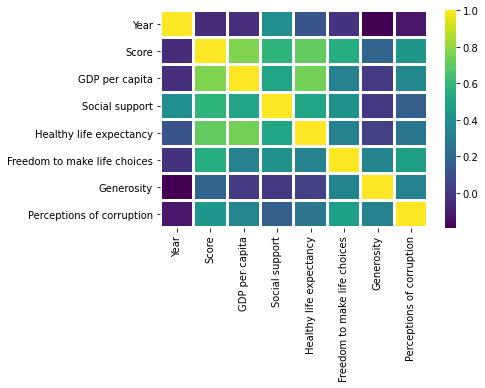

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),linewidths=2,cmap="viridis")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53835c0cc0>,
      dtype=object)

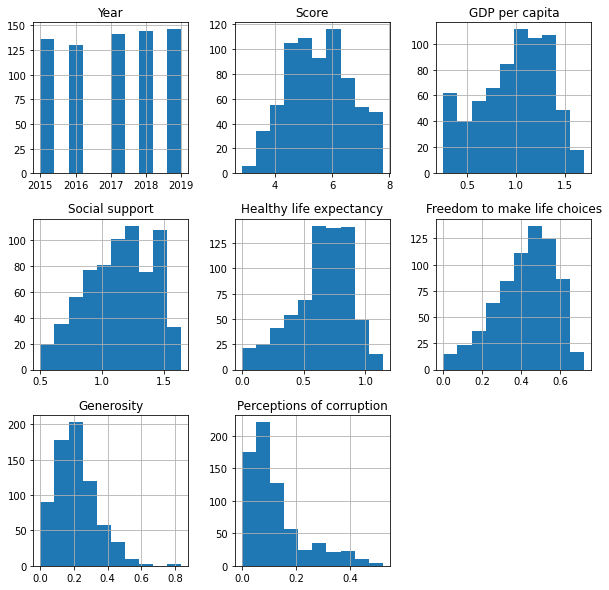

In [ ]:
data.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5383226d68>,
      dtype=object)

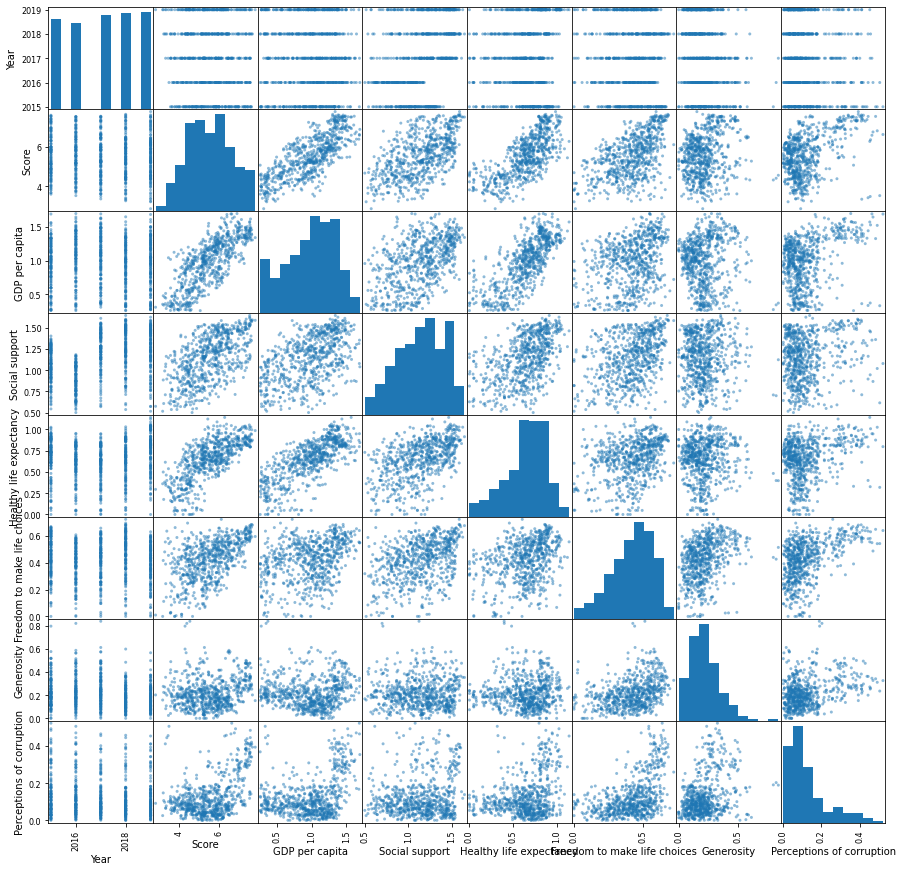

In [ ]:
pd.plotting.scatter_matrix(data, figsize=[15,15])

In [ ]:
desired_features = ["GDP per capita","Social support"]

target = data["Score"]
features = data[desired_features]

features_train, features_test, target_train, target_test  = train_test_split(features, target, test_size = 0.2, random_state = 6)

# **Model Building**

My machine learning application is predicting if GDP per capita	and Social support affect a country Score. My machine learning application is about 64% accuate in predicting a country's Score.
I changed the random_state = 9 to random_state = 6 to increase my accuracy.

In [ ]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.score(features_test, target_test)

0.6357379442352404

# **Machine Learning Application**

In [ ]:
for times in range(5):
  percent= lr.score(features_test, target_test)
  percent_accurate = percent * 100
  test = data.sample()
  test_features = test[desired_features]
  predict_score = lr.predict(test_features)
  print("Test Information")
  print(test[["Year", "Score", "Generosity", "Healthy life expectancy", "GDP per capita", "Social support"]])
  print(f"Predicted Score: {predict_score}")
  print("Please note that this is only " + str(percent_accurate) + "% accurate\n\n")

Test Information
     Year  Score  ...  GDP per capita  Social support
716  2015  5.007  ...         0.91851         1.00232

[1 rows x 6 columns]
Predicted Score: [5.24321897]
Please note that this is only 63.57379442352404% accurate


Test Information
     Year  Score  ...  GDP per capita  Social support
231  2018   5.43  ...           1.405            1.29

[1 rows x 6 columns]
Predicted Score: [6.44151012]
Please note that this is only 63.57379442352404% accurate


Test Information
     Year  Score  ...  GDP per capita  Social support
729  2015  4.786  ...         0.39047         0.85563

[1 rows x 6 columns]
Predicted Score: [4.11638493]
Please note that this is only 63.57379442352404% accurate


Test Information
     Year  Score  ...  GDP per capita  Social support
579  2016  4.574  ...         0.93287         0.70362

[1 rows x 6 columns]
Predicted Score: [4.95610834]
Please note that this is only 63.57379442352404% accurate


Test Information
     Year  Score  ...  GDP per capi

This machine learning application is going to predict if the GDP per capita and social support of a country can predict a country Score.

People could use these predictions to determine whether they would want to move to the country. The government or experts can use this prediction to make policy decisions and assess the progress of nations. For example, in 2015 a country had a actual score = 5.007, a GDP per capita = 0.91851, and Social support = 1.00232. Our predicted Score = 5.24321897, shows that our model is off but very close to the actual Score. 

Therefore, this machine learning application is going to predict if the GDP per capita and social support of a country can predict a country Score. People are free to use this application but just remeber it's only 63.57379442352404% accurate.